# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

## Linear Regression
Here we present maybe the most famous machine learning algorithm.

The linear regression model.

<p align="center">
    <img width="1116" alt="image" src="https://user-images.githubusercontent.com/49638680/159125919-9b7e2143-9670-48ed-bbc9-9f6c811290ef.png">
</p>

### Import Libraries

In [1]:
# Import libraries we will need in the following
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"
plt.rcParams['figure.figsize'] = (20.0, 15.0) # set default size of plots

from sklearn import linear_model

## Regression
In statistics, several methods to search for relationships among variables goes under the name of __regression__.

### Linear Regression
[Linear regression](https://en.wikipedia.org/wiki/Linear_regression) is a linear approach to determine relationship between two or more quantities.
For example, if we want to study the relation between population of cities and per capita income, we can collect our measures in a table like the following one.

| Population of City ($10^4$)| Profit ($10^3$ \$) |
|---|----|
| $6.1101$  |  $17.5920$    | 
| $5.5277$ |  $9.1302$  | 
| $8.5186$ |  $13.6620$    | 
| $7.0032$ |  $11.8540$  | 
| $5.8598$ |  $6.8233$ | 
| $\ldots$ |  $\ldots$ |

Let's transform this into a pandas dataframe for practical purposes.

In [2]:
datafile = 'datasets/data1.txt'
measures = measures = pd.read_csv(datafile, header= None)
measures.columns = ['Population of City in 10,000s', 'Profit in $10,000s']

In [3]:
measures.head()

,"Population of City in 10,000s","Profit in $10,000s"
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


The couples of measure data $(x_i, y_i)$ form the so called __observation set__. $y_i$ are usually called __labels__.

It might be useful to plot our measure values

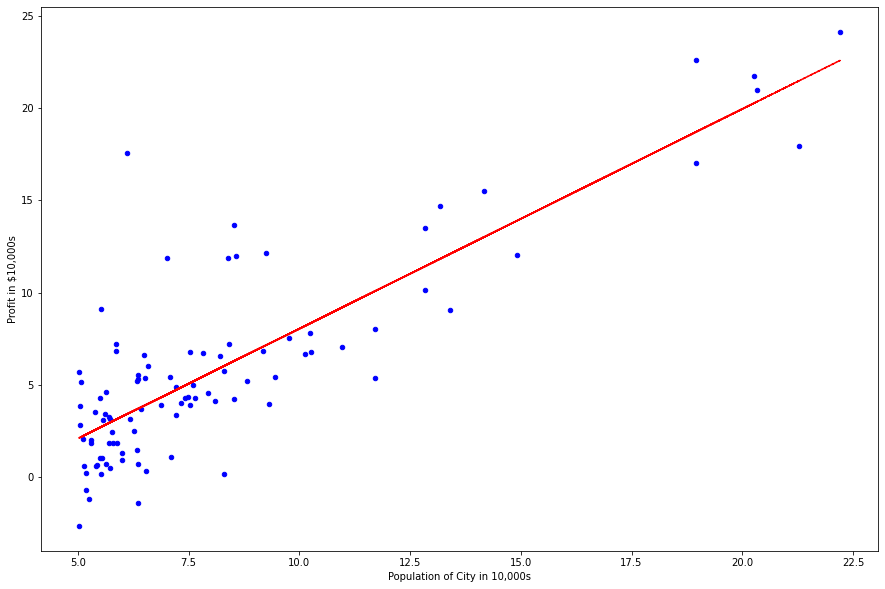

In [4]:
measures.plot(kind='scatter', x = 'Population of City in 10,000s', y = 'Profit in $10,000s', color='blue', figsize=(15,10))

# Insert a trend line
x = measures['Population of City in 10,000s']
y = measures['Profit in $10,000s']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")
plt.show()

One can easily see there is a linear trend in our data.

**PROBLEM** We want to _predict_ or _estimate_ how much will be the income of an average inhabitant of a city like Cagliari, which has a population of $15.4 \times 10^4$ people.

*rephrase*: how do we find the red line above, given data?

### Some vocabulary

Here we give some definition to start using a precise language.

* __Training set__: Set of data used to determine the parameters of the _hypothesis_ also called _prediction law_.
* __Label set__: Set of the "right answers" in a supervised learning process. In our previous example, these are the $y_i$
* __Hypothesis__: The result of a machine learning algorithm trained on a dataset. It gives us the mathematical law model (where values of parameters have been calculated in the training procedure) to make predictions. In other words, the hypothesis (with the fitted parameters) is our prediction for label set.

![](https://user-images.githubusercontent.com/49638680/159038524-30a7e714-b0e0-40cf-a9b4-e7d701e68789.png)


In the case of a linear regression, we look for a _linear_ law of the form

$$ h_\beta(x) = \beta_0 + \beta_1 x\, . $$

$h_\beta(x)$ is our prediction for the dependent variable $y$.

Determining the value of $\beta$'s is the aim of a machine learning _fit_ procedure.

Referring to the dataplot above, we are looking for the equation of the red trend line, in order to predict the value of per capita income for any possible new city inhabitant.

A convenient way to write down the hypothesis is to make use of arrays. In order to do so, we need to reshape our data as a matrix $X$.

Hence,

$$ X = \begin{pmatrix} 1   & x_1 \\
                       1   & x_2 \\
                       \ldots & \ldots \end{pmatrix} $$
                       
and

$$ h_\beta(x) = X \cdot \beta = \begin{pmatrix} 1   & x_1 \\
                                                1   & x_2 \\
                       \ldots & \ldots \end{pmatrix} \begin{pmatrix} \beta_0 \\
                                                \beta_1 \end{pmatrix} \, . $$
                                                

In other words, we consider the intercept terms $\beta_0$ as co-factors of $x^0 \equiv 1$.

In [5]:
# reshaping of X
X = np.ones((len(x), 2))
X[:,1] = x
X

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

#### Back to our example

Let's take into account the set of city populations vs income, we want to find the hypothesis, this can be done by a training procedure, thanks to the `sklearn` module `LinearRegression`.

In [7]:
model = linear_model.LinearRegression()
model.fit(X, y);

Great! We are now ready to answer the original question:
> How much will be the average income for a person living in Cagliari, which lives in a city of population $15.4 \times 10^4$ people?

In [9]:
test_population = 15.4 # recall dataset is measured in 10^4 units.
X_test = np.array([1, test_population]).reshape(1, -1)

prediction = model.predict(X_test)

print('Your predicted consumption: %.10f' %prediction)

Your predicted consumption: 14.4769372422


This is the answer we were looking for!

## Let's go in depth

### Cost Function

#### How we can determine whether a fit is good?

One may wonder how we can measure the wellness of a line passing through data points.

In a supervised learning algorithm, since we have the _right_ answers $y$ for each data point $x$, we may imagine a way to compare our hypothesis $h_\beta$ and the answers $y$.

Let us imagine we have a measure of the error, we make by approximating the trend given by data by a linear law. One may consider the best line is the one minimising such error.

Traditionally, in Machine Learning literature this is called __Cost Function__. 

#### How do we find the best parameters for the hypothesis?
* Minimising the cost function.

There might be various choices for the expression of the cost function. A very popular one is the well-known (and loved) square differences sum,

$$J(\beta) = \frac{1}{2n}\sum_{i} \left(h_\beta(x_i) - y_i \right)^2 $$

Then, the parameter set we are looking for in a fit procedure is the result of a minimisation of the cost function. 

$$ \hat{\beta} = \min_{\beta} J(\beta) $$

### Gradient Descent

The `sklearn` library can be very useful, but can hide the concept. Thus, now we want to find an algorithm to minimise the cost function. We are going to build the so-called _gradient descent_ method.

<p align="center">
    <img width="1501" alt="image" src="https://user-images.githubusercontent.com/49638680/159128331-9cc52e0b-8867-47c6-baa6-daef70963b58.png">
</p>

Wordly and schematically,

* start with some parameter values, let's say $\beta_0 = 0$ and $\beta_1 = 0$.
* keep changing $\beta$'s (in a hopefully smart way) to reduce $J(\beta)$. 
* keep evaluating $J(\beta)$ to keep track of the error.

![](../images/GradDesc.gif)

The algorithm can be summarised as follows.

Iteratively, reassign the parameter values,

$$ \beta_\kappa = \beta_\kappa - \alpha \dfrac{\partial}{\partial \beta_\kappa} J(\beta)$$

where $\kappa = 0,1$ and $\alpha$ is a parameter called _learning rate_.

Repeat this until one of the three exit conditions is met:
1. __convergence__ The error is lower than a threshold. $$J(\beta^i) < \varepsilon\, .$$
2. __max number of iteration__ The max number of iterations has been computed. $$i = i_\mathrm{max}\, .$$
3. __flat cost__ The cost function does not change more than a threshold in one iteration. $$\frac{|J(\beta^i) - J(\beta^{i-1})|}{J(\beta^i)} < \varepsilon\, . $$

## Excercise

Implement a linear regression model using pure numpy.

### Functions for gradient descent algorithm

Let's define python functions, implementing a gradient descent algorithm. Let's start by function parameters.

In [10]:
# parameters 
max_iterations = 1500 
alpha = 0.01 # learing rate

# adding initial β
beta = np.zeros(2)

In [11]:
beta # array of parameters 

array([0., 0.])

Hence, the compute cost function.

In [12]:
def compute_cost(X, y, beta):
    """
        (array of float, array of float, array of float) -> float
        
        :return: the value of squared-difference cost function.
    """
    n = len(y)
    cost = np.dot((np.dot(X,beta) - y ), (np.dot(X,beta) - y ))/(2*n) 
    return cost

In [14]:
print('Your computed cost: %.10f' %compute_cost(X,y,beta))
print('You should get approximatively: 32.0727')

Your computed cost: 32.0727338775
You should get approximatively: 32.0727


This is the cost with the zero-initialised $\beta$ weights. Hence, if you want, it is the unfitted-model cost.

Now, we have to find the "right" $\beta$'s values. The ones minimising such function.
Numerically, we do this by updating them iteratively. Hence, we miss the function for gradient descend.

In [15]:
# Gradient descent algorithm
def gradientDescent(X, y, beta, alpha, max_iterations, cost_thr = 1e-5):
    """
        (array of float, array of float, array of float, float, int, [float]) -> array of float, array of float, float, int
        
        :return: the following tuple:
            - array of parameters beta
            - array of beta for each step
            - cost function
            - number of iterations
    """
    
    n = len(y)
    # cost = np.zeros(max_iterations)
    cost = []
    betaMod = beta.copy()
    # betaHist = np.zeros(max_iterations)
    beta0Hist = []
    beta1Hist = []
    
    for i in range(max_iterations):                                             
        betaMod = betaMod - (np.dot(X.T, (np.dot(X, betaMod) - y)) * alpha) / n 
        beta0Hist.append(betaMod[0])
        beta1Hist.append(betaMod[1])        
        # cost[i] = compute_cost(X, y, betaMod)
        cost.append(compute_cost(X, y, betaMod))
        # exit conditions
        if cost[i] < cost_thr:
            break
        if i > 0 and (abs(cost[i] - cost[i-1])/cost[i] < cost_thr):
            break
        
    cost = np.array(cost)
    beta0Hist = np.array(beta0Hist)
    beta1Hist = np.array(beta1Hist)
    betaHist = [beta0Hist, beta1Hist]
    
    return betaMod, betaHist, cost, i

In [16]:
betaFit, betaHist, cost, iterations = gradientDescent(X, y, beta, alpha, max_iterations)  

Let's visualise the behaviour of our algorithm: we print some plots, per iteration.

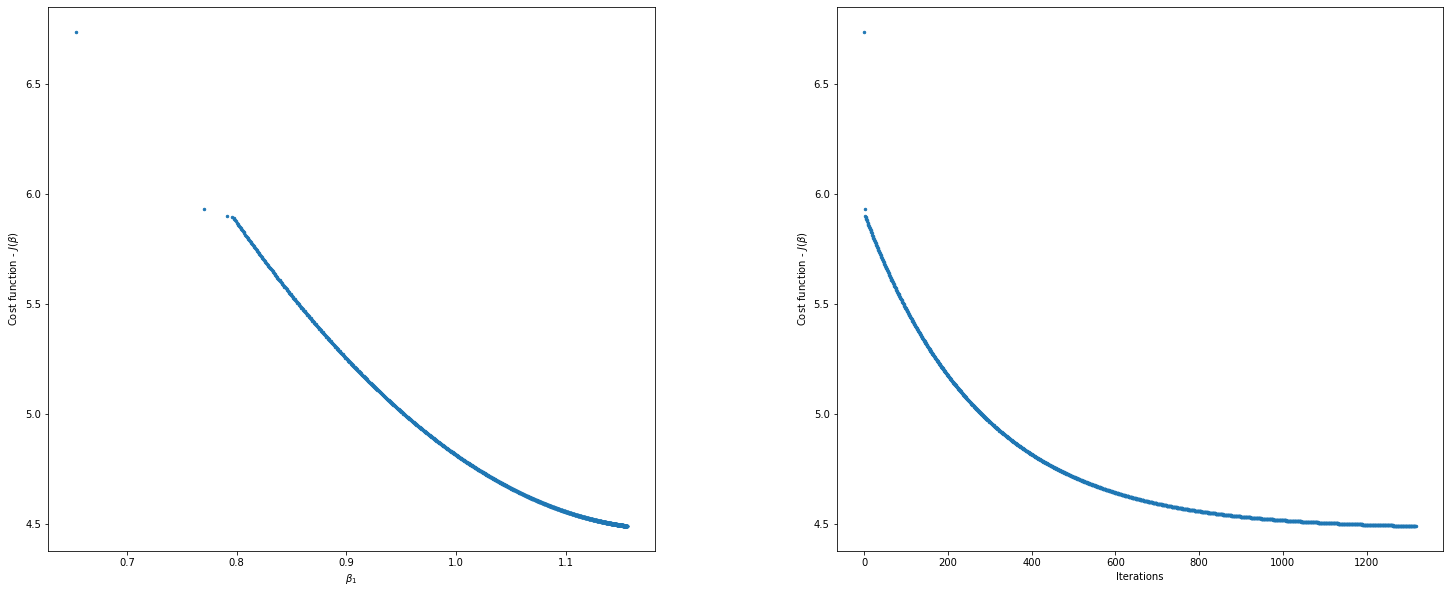

In [19]:
fig = plt.figure(figsize=(25, 10))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Minimization path:
ax1.scatter(betaHist[1], cost,  marker='o', s=6)
ax1.set_xlabel(r'$\beta_1$')
ax1.set_ylabel(r"Cost function - $J(\beta)$");

# Cost-Iterations plot:
ax2.scatter(np.arange(len(cost)), cost,  marker='o', s=6)
ax2.set_xlabel("Iterations")
ax2.set_ylabel(r"Cost function - $J(\beta)$");

Great! The cost function goes down with the parameter updates and with iterations.

### The prediction
Let's now move on and go to the prediction part. We are interested in the predicted value on new data. 
How do we get such an information?

Mathematically this is given by the hypothesis function (that in a linear regression model is linear):

$$ \hat{y} = h_\beta(x_\mathrm{new}) = \beta_0 + \beta_1 x_\mathrm{new}\, .$$

Let's define this function in python

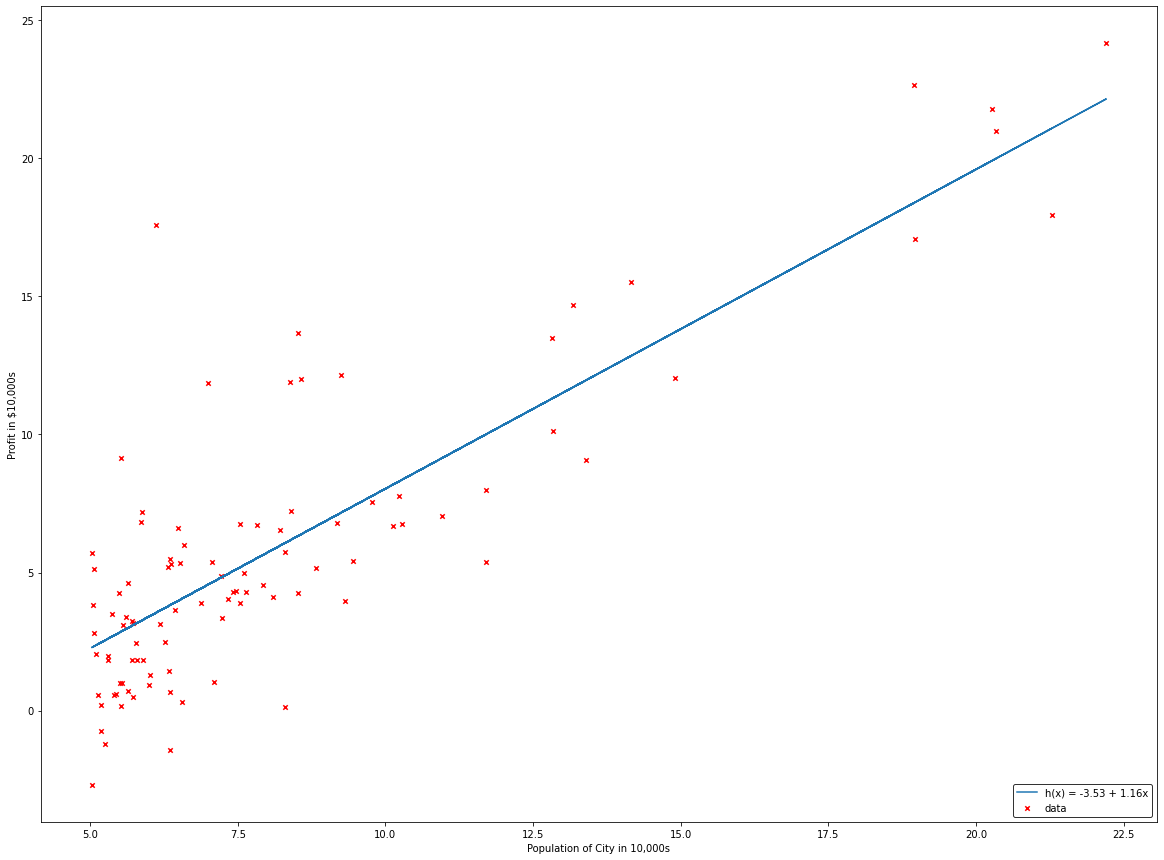

In [23]:
def linear_fit(value):
    return betaFit[0] + betaFit[1] * value

plt.rcParams["figure.figsize"] = 20, 15
plt.scatter(X[:,1], y, marker='x', c='r', s=20, label='data')
plt.plot(X[:, 1], linear_fit(X[:, 1]), label='h(x) = %0.2f + %0.2fx'%(betaFit[0], betaFit[1]))
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
pst = plt.legend(loc='lower right', frameon=True)
pst.get_frame().set_edgecolor('k');

Thus, to make a prediction, we call `linear_fit` on new data.

In [24]:
# make prediction
lin_fit = linear_fit(test_population)

In [26]:
print('Your predicted consumption with sklearn: %.10f' %prediction)
print('Your predicted consumption with your linearFit: %.10f' %lin_fit)
print('You should get approximatively: 14.4769')

Your predicted consumption with sklearn: 14.4769372422
Your predicted consumption with your linearFit: 14.2752305826
You should get approximatively: 14.4769


There are little differences, but if you completed the code correctly they are under the $3\%$. 

In [27]:
print('Relative error: %.2f%%' %(abs(prediction - lin_fit)*100/prediction))

Relative error: 1.39%


We want to calculate the Cost function over a grid, to make a contour plot. We are going to make use of your `compute_cost` function.

In [29]:
# Grid to calculate cost values
beta0_vals = np.linspace(-10, 10, 80)
beta1_vals = np.linspace(-1, 4, 80)

# initialize J_vals to a matrix of 0's:
J_vals = np.zeros((len(beta0_vals), len(beta1_vals)))

# Fill out J_vals:
for i in np.arange(beta0_vals.size):
    for j in np.arange(beta1_vals.size):
        t = np.array([beta0_vals[i], beta1_vals[j]])
        J_vals[i, j] = compute_cost(X, y, t)

This array (grid evaluation of $J(\beta)$) can be used to produce surface plot.

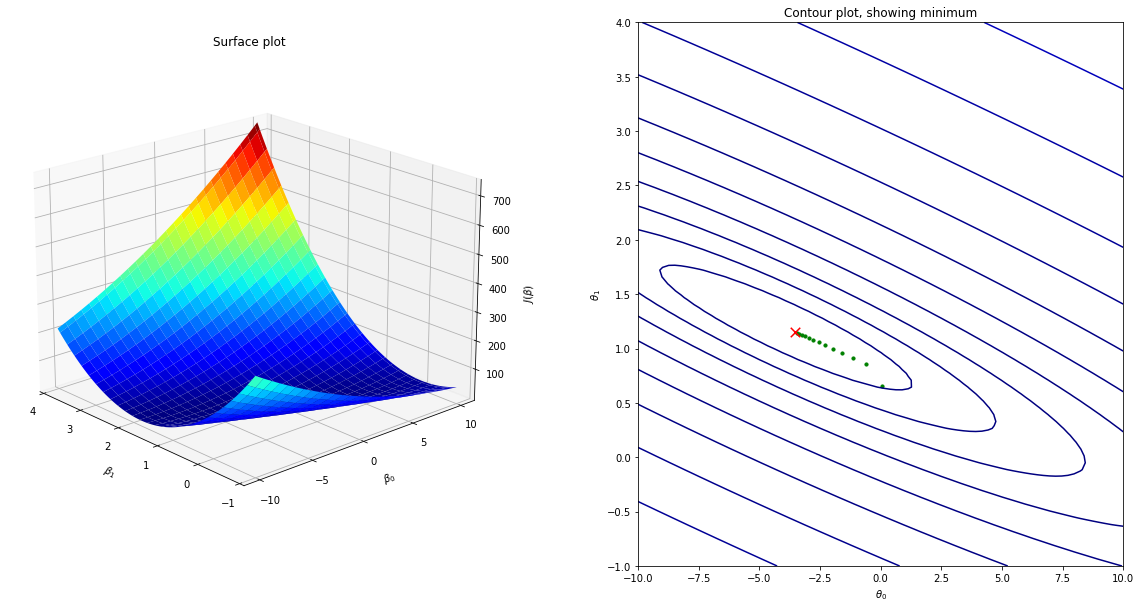

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

beta0, beta1 = np.meshgrid(beta0_vals, beta1_vals)

# Surface plot:
ax1.set_title('Surface plot')
ax1.plot_surface(beta1, beta0, J_vals.T, cmap='jet', rstride=3, cstride=3, antialiased=True)
ax1.view_init(elev=20, azim=318)
ax1.set_xlabel(r'$\beta_1$', labelpad=8)
ax1.set_xlim(4,-1)
ax1.set_ylabel(r'$\beta_0$', labelpad=8)
ax1.set_yticks(np.linspace(-10, 10, 5))
ax1.set_zlabel(r'$J(\beta)$', labelpad=8);

# Contour plot:
ax2.set_title('Contour plot, showing minimum')
ax2.contour(beta0, beta1, J_vals.T, np.logspace(0, 4, 20),  cmap='jet')
for k in range(int(iterations/100)):
    ax2.scatter(betaHist[0][100*k], betaHist[1][100*k], marker='.', color='g', s=40)

ax2.scatter(betaFit[0], betaFit[1], marker='x', color='r', s=90)
ax2.set_xlabel(r'$\theta_0$')
ax2.set_ylabel(r'$\theta_1$')
ax2.set_yticks(np.arange(-1,4.5,0.5));

### A recap for linear regression

* __Hypothesis__: $ h_\beta(x) = \beta_0 + \beta_1 x$
* __Parameters__: $\beta_0$, $\beta_1$
* __Cost function__: $J(\beta) = \frac{1}{2n}\sum_{i} \left(h_\beta(x_i) - y_i \right)^2 $
* __Fit__: $ \min_{\beta} J(\beta) $

---

### Further Exercises

#### Exercise 1

Is there a relationship between water salinity & water temperature? Can you predict the water temperature based on salinity? 

1. Using data contained in this [csv](https://www.kaggle.com/sohier/calcofi#bottle.csv) try to give an answer to this question.

2. Knowing that we have to find the _minimun_ of the cost function with respect to $\beta$ and that $ \partial_\beta J(\beta) = 0 $ is an equation in $\beta$. Use linear algebra to find the right coefficients $\beta$ without any loop calculation.

3. Use the equation found above to (re-)calculate $\beta$ and compare with the gradient descent and `sklearn` results.

_Hint for point 2._ Recall that one may use matrix notation to write
$$ \partial_\beta J(\beta) = X^t(X\beta - y) $$

#### Exercise 2

For example, we want to study the trend of fuel consumption as a function of the engine capacity, we can collect our measures in a table like the following.

| Engine capacity (cm$^3$) | Average Consumption (l/100km) |
|---|----|
| $800$  |  $6$    | 
| $1000$ |  $7.5$  | 
| $1100$ |  $8$    | 
| $1200$ |  $8.7$  | 
| $1600$ |  $12.4$ | 
| $2000$ |  $16$   | 
| $3000$ |  $20$   | 
| $4500$ |  $28$   | 

Apply linear regression to find the average consumption of an engine with `test_capacity = 1800`.

Use both `sklearn` library and your defined functions and compare the results.

_Hint for data conversion._ Recall that one may use pandas and python dictionaries to create dataframes.

```python
measures = pd.DataFrame({'Consumption_avg': [6, 7.5, 8, 8.7, 12.4, 16, 20, 28], 
                         'Capacity': [800, 1000, 1100, 1200, 1600, 2000, 3000, 4500]})
```